## ***Прогнозирование будущий продаж***

Импортируем библиотеки и набор данных.

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
data = pd.read_csv("dataset.csv")
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


Проверим набор данных на пропуски.

In [28]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Отобразим взаимосвязь между суммой, потраченной на рекламу, и проданными единицами товара.

In [29]:

figure = px.scatter(data_frame = data, x="Sales",
                    y="TV", size="TV", trendline="ols", color="TV")
figure.show()
figure = px.scatter(data_frame = data, x="Sales",
                    y="Newspaper", size="Newspaper", trendline="ols", color="Newspaper")
figure.show()
figure = px.scatter(data_frame = data, x="Sales",
                    y="Radio", size="Radio", trendline="ols",color="Radio")
figure.show()


Отобразим корреляцию

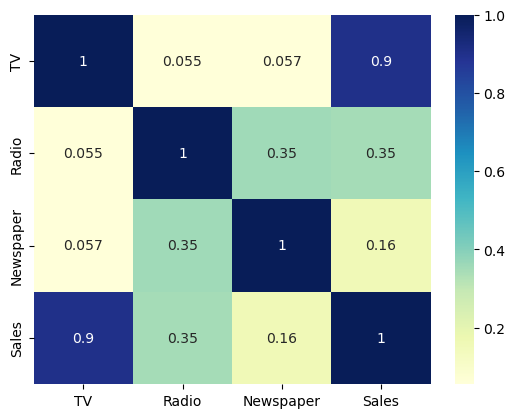

In [30]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

Заметим, что больше всего на продажи влияет TV.

Разделим выборку и обучим модель машинного обучения.В качестве модели я буду использовать линейную регрессию.

In [34]:
x = np.array(data.drop(["Sales"], axis=1))
y = np.array(data["Sales"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=29)
model = LinearRegression()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9383436807514248
